In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
generator_data = np.random.multivariate_normal((0, 0), [[1000,0], [0,1000]], 10000)

In [5]:
data_1d_a = np.random.normal(-2,0.5,size=100)

In [6]:
data_1d_b = np.random.normal(2,0.5,size=100)

In [7]:
data_1d = np.concatenate((data_1d_a,data_1d_b))

In [8]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)


In [9]:
x,y = pol2cart(5.0, data_1d)

In [10]:
data = np.column_stack((x,y))

In [11]:
xmin, xmax = -10, 10
ymin, ymax = -10, 10

/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


(-10.0, 10.0, -10.0, 10.0)

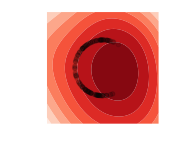

In [12]:
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
x = data[:, 0]
y = data[:, 1]
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)



fig = plt.figure(figsize=(2,2))


ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, cmap='Blues')

xg = generator_data[:, 0]
yg = generator_data[:, 1]

values = np.vstack([xg, yg])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Reds', alpha=1.0)
plt.scatter(x, y, alpha=0.1, color='k')

## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
#cset = ax.contour(xx, yy, f, colors='k', alpha=0.2)
# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

ax.set_visible(True)

plt.axis('off')



In [211]:
fig.savefig('large_space.pdf',  bbox_inches='tight', pad_inches=0.2)

(-10.0, 10.0, -10.0, 10.0)

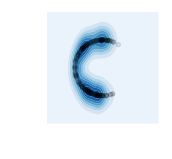

In [13]:
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
x = data[:, 0]
y = data[:, 1]
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)



fig = plt.figure(figsize=(2,2))


ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')

xg = generator_data[:, 0]
yg = generator_data[:, 1]

values = np.vstack([xg, yg])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, cmap='Reds', alpha=1.0)
plt.scatter(x, y, alpha=0.1, color='k')

## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
#cset = ax.contour(xx, yy, f, colors='k', alpha=0.2)
# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

ax.set_visible(True)

plt.axis('off')



In [211]:
fig.savefig('small_space.pdf',  bbox_inches='tight', pad_inches=0.2)